In [58]:
using Plots, FileIO 
using OrdinaryDiffEq
using LsqFit

We look at a long run of the type big_right, with parameters:

`    χ = [-1,-1,-20.] # the equation parameters `

`    ξ = -100*π*[1, -15, -1] # new source parámeters     1/κ, 1/λ, 1/η `



In [43]:
U = 10
L=4. # Length of the integration region
M=600 # number of space-points in the discretization
tf=80. # final time
dx = L/M
dt = 0.1 * dx
x = [(i-1)*dx for i in 1:M]
size(x)

(600,)

In [41]:
sol = load("Resultados/Soluciones/big_right_long_fast.jld2","big_right_long_fast");
sol_E = load("Resultados/Soluciones/big_pulse_to_the_right_E_fast.jld2","big_pulse_to_the_right_E_fast");

┌ Warning: some parameters could not be resolved for type ODEFunction{true,Main.#evolution_fast,LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing}; reconstructing
└ @ JLD2 /Users/reula/.julia/packages/JLD2/F7wiE/src/data/reconstructing_datatypes.jl:440
┌ Warning: some parameters could not be resolved for type ODEFunction{true,Main.#evolution_fast,LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing}; reconstructing
└ @ JLD2 /Users/reula/.julia/packages/JLD2/F7wiE/src/data/reconstructing_datatypes.jl:440


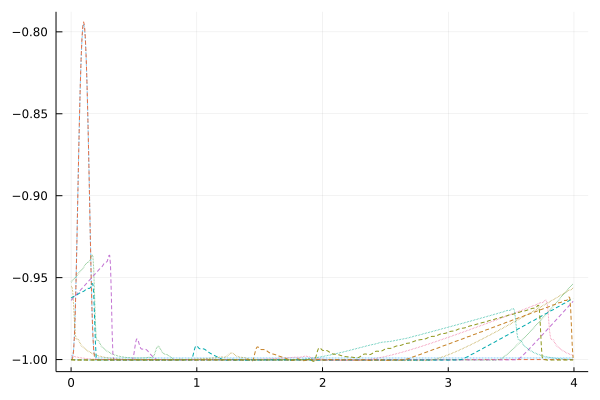

In [118]:
field = 6
N = 5 # has to be at most 100 (we are sampling at 0.01*tf, if we put some other time, 
                              #it is going to interpolate!)
plot(legend=false)
for i in 1:N
    t = tf*(i-1)/(N-1)
plot!(x,reshape(sol(t),(M,U))[:,field]
        #, label="ti"
        , ls=:dot)
plot!(x,reshape(sol_E(t),(M,U))[:,field]
        #, label="ti"
        , ls=:dash)
end
current()

We observe a speed difference and that the discontinuities are different, there is a small previous rise, a sort of pre-shock increase. Both equilibrium quantities behave the same.

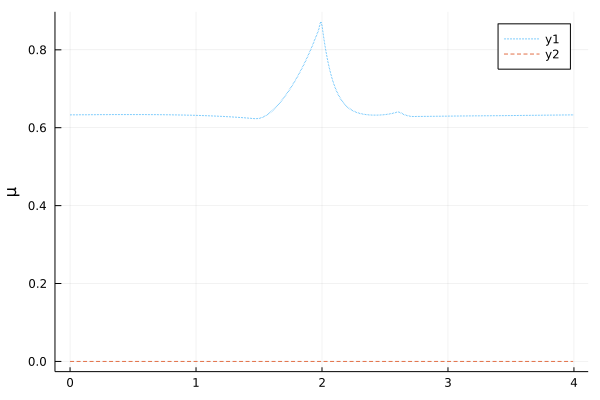

In [131]:
field = 5
t  = 12*tf/100
plot(x,reshape(sol(t),(M,U))[:,field]
        #, label="ti"
        , ls=:dot
        , ylabel="μ")
plot!(x,reshape(sol_E(t),(M,U))[:,field]
        #, label="ti"
        , ls=:dash)

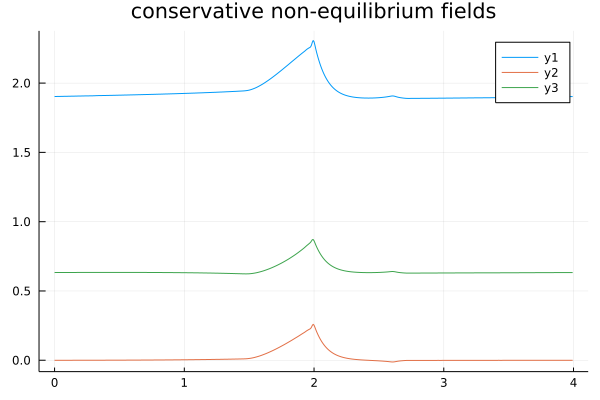

In [134]:
plot(title="conservative non-equilibrium fields")
t  = 12*tf/100
for field in 3:5
plot!(x,reshape(sol(t),(M,U))[:,field])
end
current()

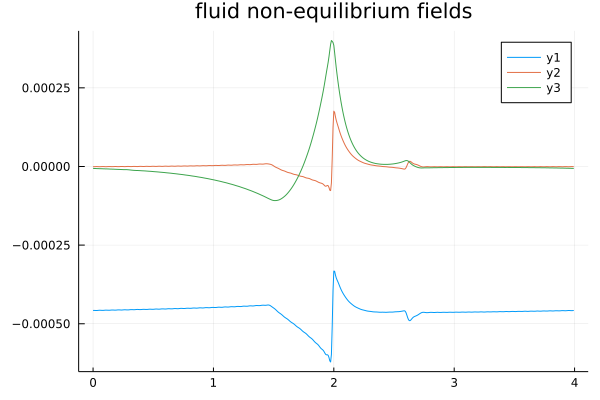

In [135]:
plot(title="fluid non-equilibrium fields")
t  = 12*tf/100
for field in 8:10
plot!(x,reshape(sol(t),(M,U))[:,field])
end
current()

Next we look at the shock decay, they seems to be equal, no dissipation effect appearing. 
Both decay as $t^{-\frac32}$

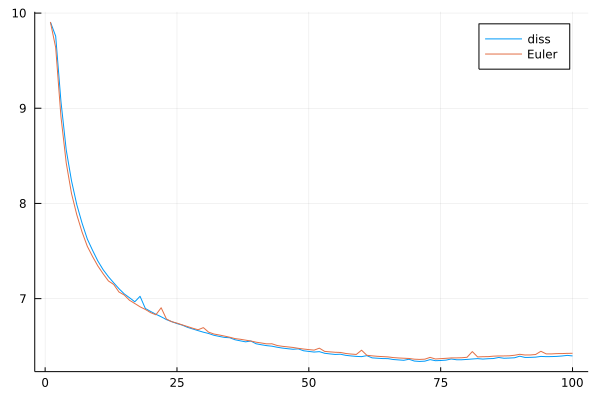

In [96]:
m = zeros(100)
m_E = zeros(100)
t_vec = zeros(100)
field = 1
for i in 1:100
t_vec[i] = tf*(i-1)/99
m[i] = maximum(reshape(sol(t_vec[i]),(M,U))[:,field])
    
m_E[i] = maximum(reshape(sol_E(t_vec[i]),(M,U))[:,field])
end
plot(m, label="diss")
plot!(m_E, label="Euler")

In [113]:
model_1(t,p) = p[1]*(t.+p[2]).^p[4] .+ p[3]
p1 = [2, 0.5, 10.,-1.]
model_2(t,p) = p[1]*(t.+p[2]).^(-3/2) .+ p[3]
p2 = [10.,5.,0.]
fit_1 = curve_fit(model_1, t_vec, m, p1)
fit_2 = curve_fit(model_2, t_vec, m, p2)
println(fit_1.param)
println(fit_2.param)

[74.73925399226707, 6.498782603304824, 6.287222272901272, -1.5897734725406139]
[56.46898380829897, 6.003802687197014, 6.274391214517657]


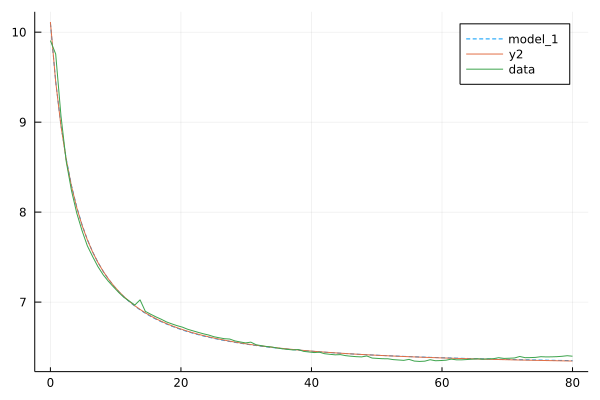

In [116]:
plot(t_vec,model_1(t_vec,fit_1.param), ls=:dash, label="model_1")
plot!(t_vec,model_2(t_vec,fit_2.param))
plot!(t_vec,m, label="data")

┌ Info: Saved animation to 
│   fn = /Users/reula/Julia/Fluidos_Conformes/Resultados/Movies/tmp.gif
└ @ Plots /Users/reula/.julia/packages/Plots/XuV6v/src/animation.jl:104


Plots.AnimatedGif("/Users/reula/Julia/Fluidos_Conformes/Resultados/Movies/tmp.gif")
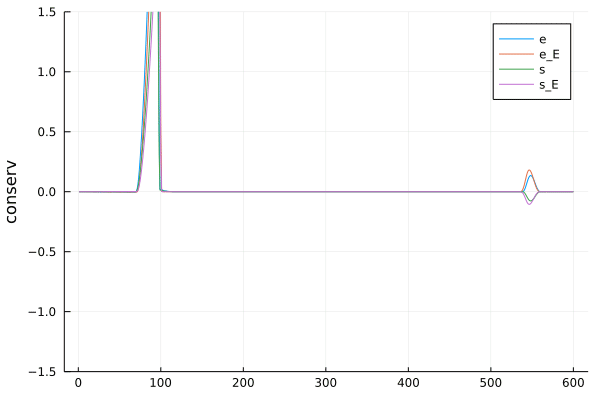

In [90]:
t=tf
shift = 0# U÷2 # 0 is conserv otherwise is fluid
anim = @animate for i ∈ 1:100
    t = tf*(0.01*i)
    plot((reshape(sol(t),(M,U))[:,shift+1] .- 6.0),label="e"
    , yaxis = ("conserv", (-1.5,1.5))
    )
    plot!((reshape(sol_E(t),(M,U))[:,shift+1] .- 6.0),label="e_E")
    plot!((reshape(sol(t),(M,U))[:,shift+2] .- 0.),label="s")
    plot!((reshape(sol_E(t),(M,U))[:,shift+2] .- 0.),label="s_E")
end

gif(anim, "Resultados/Movies/tmp.gif", fps = 10)